IMPORT MODULES

In [1]:
#import relevant modules
from astroquery.jplhorizons import Horizons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import functions
import subprocess
import os
import time
import math
import datetime

READING DATA

In [2]:
df = pd.read_excel('Data/Parallax Data.xlsx')
df

,Date + Time,Exp time,RA,RA in Degrees,RMS_X,FWHM_x (as),object counts,mean count,background pp,Readout Noise pp,...,Unnamed: 23,Durham lat:,54.7680884,0.9558834676033132,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,2024-02-18T20:54:07.328,30.0,NaN,96.018710,0.155,4.07,16527.0,46.011,153.41,8.0,...,NaN,La Palma lat:,28.760234,0.501961,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-18T20:56:08.831,30.0,NaN,96.019991,0.202,4.00,18921.0,25.980,157.79,8.0,...,NaN,Durham long:,358.4177,6.255569,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-18T20:56:49.481,30.0,NaN,96.020552,0.139,3.39,17401.0,42.096,150.94,8.0,...,NaN,La Palma long:,342.1176,5.971079,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-18T20:59:31.381,30.0,NaN,96.022187,0.159,3.28,17363.0,41.740,153.65,8.0,...,NaN,Earth Radius:,6371000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-18T21:02:13.557,30.0,NaN,96.024048,0.165,4.87,18125.0,24.611,152.64,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-02-18T21:04:54.723,30.0,NaN,96.025925,0.210,4.18,21876.0,26.456,154.68,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,95.982410,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,errors by functional approach,NaN,NaN
7,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,ERRORS,ERRORS,ERRORS,ERRORS,ERRORS
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,theta (deg),baseline,d,d (AU),func_Dec,func_RA,func_theta,func_d,func_d(AU)
9,2024-02-18T20:54:24.8610,30.0,NaN,96.017046,0.101,3.91,71133.0,488.770,2376.50,18.0,...,NaN,0.003036,3141797.040879,59285371334.64621,0.396298,-0.0,0.000009,0.000009,166964358.732269,0.001113


PLOTTING RA VS DEC

C:\Users\bradl\AppData\Local\Temp\ipykernel_19892\3242006241.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sc = plt.scatter(RA_dur+RA_lapalma,Dec_dur+Dec_lapalma,s=0,c=time_color, vmin=0, vmax=0.5)


"fig, ax = plt.subplots()\nax.errorbar(RA_lapalma, Dec_lapalma, xerr = RA_err_lapalma, yerr = Dec_err_lapalma, ecolor=col, marker='o', label = 'La Palma', linestyle = '-', capsize=3)\nax.errorbar(RA_dur, Dec_dur, xerr = RA_err_dur, yerr = Dec_err_dur, color='green', marker='x', label = 'Durham', linestyle='-', capsize=3)\nax.xlabel('RA (deg)'); plt.ylabel('Dec (deg)')\nax.legend()"

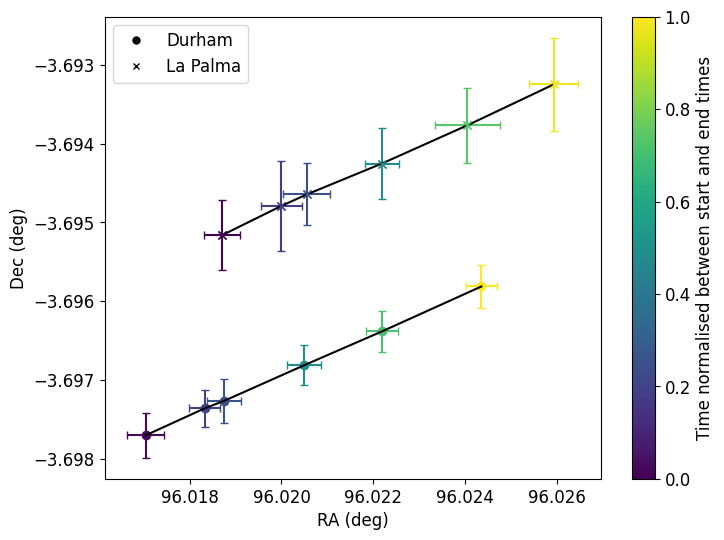

In [127]:
error_multiplier = 10

RA_lapalma = df['RA in Degrees'][0:6]
RA_err_lapalma = df['RA err (as)'][0:6]/3600 * error_multiplier
Dec_lapalma = df['Dec in Degrees'][0:6]
Dec_err_lapalma = df['Dec err'][0:6]/3600 * error_multiplier
time_lapalma = df['Date + Time'][0:6]
RA_dur = df['RA in Degrees'][9:15]
RA_err_dur= df['RA err (as)'][9:15]/3600 * error_multiplier
Dec_dur = df['Dec in Degrees'][9:15]
Dec_err_dur = df['Dec err'][9:15]/3600 * error_multiplier
time_dur = df['Date + Time'][9:15]
from astropy.time import Time
t_dur = np.array([Time(time, format='isot').mjd for time in time_dur])
t_lapalma = np.array([Time(time, format='isot').mjd for time in time_lapalma])
t_dur_diff = t_dur - min(np.concatenate([t_dur, t_lapalma]))
t_lapalma_diff = t_lapalma - min(np.concatenate([t_dur, t_lapalma]))

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 12, 'lines.markersize': 6})
#convert time to a color tuple using the colormap used for scatter
import matplotlib
import matplotlib.cm as cm
from matplotlib.lines import Line2D
norm = matplotlib.colors.Normalize(vmin=min(np.concatenate([t_dur_diff,t_lapalma_diff])), vmax=max(np.concatenate([t_dur_diff,t_lapalma_diff])), clip=False)
mapper = cm.ScalarMappable(norm = norm, cmap='viridis')
time_color = np.array([mapper.to_rgba(v) for v in np.concatenate([t_dur_diff,t_lapalma_diff])])

#create a scatter plot
sc = plt.scatter(RA_dur+RA_lapalma,Dec_dur+Dec_lapalma,s=0,c=time_color, vmin=0, vmax=0.5)

#create colorbar according to the scatter plot
clb = plt.colorbar(sc, label = 'Time normalised between start and end times')

#loop over each data point to plot
for x, y, xe, ye, color in zip(RA_dur, Dec_dur, RA_err_dur, Dec_err_dur, time_color[0:len(RA_dur)]):
    plt.plot(x, y, 'o', color=color)
    plt.errorbar(x, y, xe, ye, capsize=3, color=color)

for x, y, xe, ye, color in zip(RA_lapalma, Dec_lapalma, RA_err_lapalma, Dec_err_lapalma, time_color[len(RA_dur):]):
    plt.plot(x, y, 'x', color=color)
    plt.errorbar(x, y, xe, ye, marker='x', capsize=3, color=color)

#creating legend
point_dur = Line2D([0], [0], label='Durham', marker='o', markersize=5, 
         markeredgecolor='black', markerfacecolor='black', linestyle='')
point_lapalma = Line2D([0], [0], label='La Palma', marker='x', markersize=5, 
         markeredgecolor='black', markerfacecolor='black', linestyle='')
plt.legend(handles=[point_dur, point_lapalma])
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.plot(RA_dur, Dec_dur, color='black')
plt.plot(RA_lapalma, Dec_lapalma, color='black')

#plt.scatter(RA_dur, Dec_dur, c=t_dur)
"""fig, ax = plt.subplots()
ax.errorbar(RA_lapalma, Dec_lapalma, xerr = RA_err_lapalma, yerr = Dec_err_lapalma, ecolor=col, marker='o', label = 'La Palma', linestyle = '-', capsize=3)
ax.errorbar(RA_dur, Dec_dur, xerr = RA_err_dur, yerr = Dec_err_dur, color='green', marker='x', label = 'Durham', linestyle='-', capsize=3)
ax.xlabel('RA (deg)'); plt.ylabel('Dec (deg)')
ax.legend()"""

#add scale bar to show 1 arcsecond.

#colour code points with time